## Imports

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Load Images Utility

In [2]:
def load_images_from_folder(folder):
    imnames = []
    images = []
    for imname in os.listdir(folder):
        imrgb = cv2.imread(os.path.join(folder,imname))
        im = cv2.cvtColor(imrgb, cv2.COLOR_BGR2GRAY)        
        if im is not None:
            imnames.append(imname)
            images.append(im)
    return imnames, images

## Load & Process Loop

In [3]:
no_obs_folder='test_image_pairs/not_obstacle'
no_obs_imnames, no_obs_images = load_images_from_folder(no_obs_folder)
obs_folder='test_image_pairs/obstacle'
obs_imnames, obs_images = load_images_from_folder(obs_folder)

## Read Obstacle Images

In [4]:
im = obs_images[0]
w = im.shape[1]
im1 = im[:,:w//2]
im2 = im[:,w//2:]

## Show Separated Obstacle Images

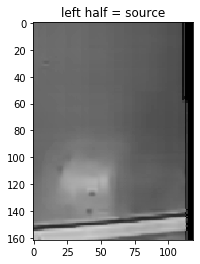

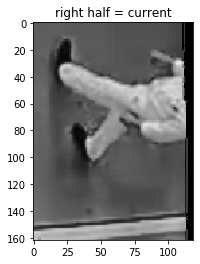

In [5]:
plt.imshow(im1, cmap='gray', vmin=0, vmax=255)
plt.title('left half = source')
plt.show()

plt.imshow(im2, cmap='gray', vmin=0, vmax=255)
plt.title('right half = current')
plt.show()

## 3 Substraction Methods of Obstacle Images: 
* Plain
* Absolute
* Enhanced
* Absolute DCT

In [6]:
plain = cv2.subtract(im2, im1)
absolute = cv2.absdiff(im2, im1)
enhanced = cv2.absdiff(im2, im1)

alpha = 2.0
beta = 25

for y in range(absolute.shape[0]):
    for x in range(absolute.shape[1]):
        enhanced[y,x] = np.clip(alpha*absolute[y,x] + beta, 0, 255)
        
imf = np.float32(plain)/255.0       
height, width = imf.shape
if (height % 2 == 1):
    height += 1
if (width % 2 == 1):
    width += 1
resized_imf = cv2.resize(imf, (width, height)) 
dct = cv2.dct(resized_imf)  
abs_dct = np.abs(dct)          

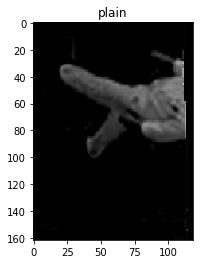

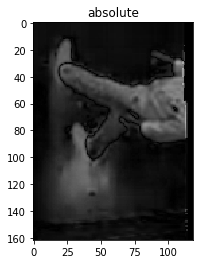

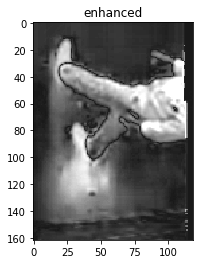

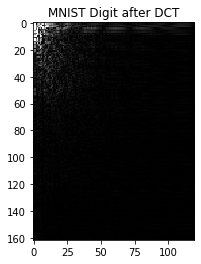

In [7]:
plt.imshow(plain, cmap='gray', vmin=0, vmax=255)
plt.title('plain')
plt.show()

plt.imshow(absolute, cmap='gray', vmin=0, vmax=255)
plt.title('absolute')
plt.show()

plt.imshow(enhanced, cmap='gray', vmin=0, vmax=255)
plt.title('enhanced')
plt.show()

plt.imshow(abs_dct, cmap='gray', vmin=0, vmax=1)
plt.title('MNIST Digit after DCT')
plt.show()

## Show Separated Non-Obstacle Images

In [8]:
im = no_obs_images[0]
w = im.shape[1]
im1 = im[:,:w//2]
im2 = im[:,w//2:]

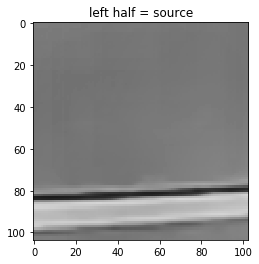

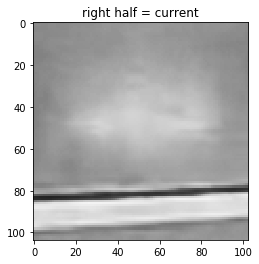

In [9]:
plt.imshow(im1, cmap='gray', vmin=0, vmax=255)
plt.title('left half = source')
plt.show()

plt.imshow(im2, cmap='gray', vmin=0, vmax=255)
plt.title('right half = current')
plt.show()

## 3 Substraction Methods of Non-Obstacle Images: 
* Plain
* Absolute
* Enhanced

In [10]:
plain = cv2.subtract(im2, im1)
absolute = cv2.absdiff(im2, im1)
enhanced = cv2.absdiff(im2, im1)

alpha = 2.0
beta = 25

for y in range(absolute.shape[0]):
    for x in range(absolute.shape[1]):
        enhanced[y,x] = np.clip(alpha*absolute[y,x] + beta, 0, 255)
        
imf = np.float32(plain)/255.0       
height, width = imf.shape
if (height % 2 == 1):
    height += 1
if (width % 2 == 1):
    width += 1
resized_imf = cv2.resize(imf, (width, height)) 
dct = cv2.dct(resized_imf)  
abs_dct = np.abs(dct)     

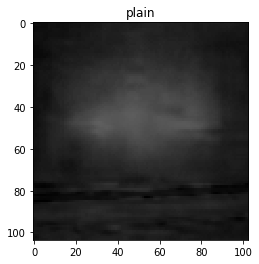

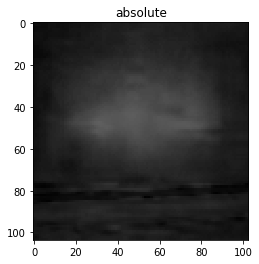

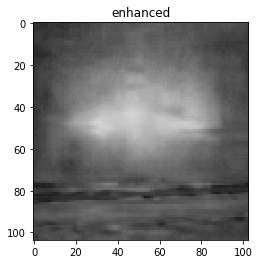

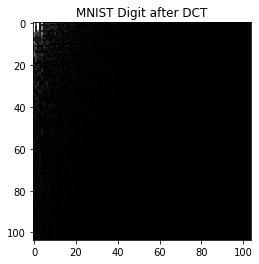

In [11]:
plt.imshow(plain, cmap='gray', vmin=0, vmax=255)
plt.title('plain')
plt.show()

plt.imshow(absolute, cmap='gray', vmin=0, vmax=255)
plt.title('absolute')
plt.show()

plt.imshow(enhanced, cmap='gray', vmin=0, vmax=255)
plt.title('enhanced')
plt.show()

plt.imshow(abs_dct, cmap='gray', vmin=0, vmax=1)
plt.title('MNIST Digit after DCT')
plt.show()

## Validation of DCT on MNIST Digits

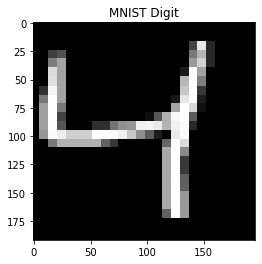

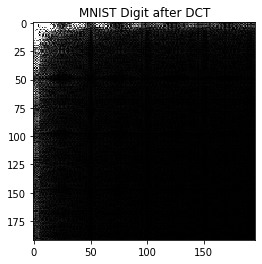

In [12]:
im = cv2.imread('other/digit_4.png')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imf = np.float32(gray)/255.0       
height, width = imf.shape
if (height % 2 == 1):
    height += 1
if (width % 2 == 1):
    width += 1
resized_imf = cv2.resize(imf, (width, height)) 
dct = cv2.dct(resized_imf)  
abs_dct = np.abs(dct)    

plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title('MNIST Digit')
plt.show()

plt.imshow(abs_dct, cmap='gray', vmin=0, vmax=1)
plt.title('MNIST Digit after DCT')
plt.show()